In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense



In [ ]:
df = pd.read_csv("/content/Train.csv")

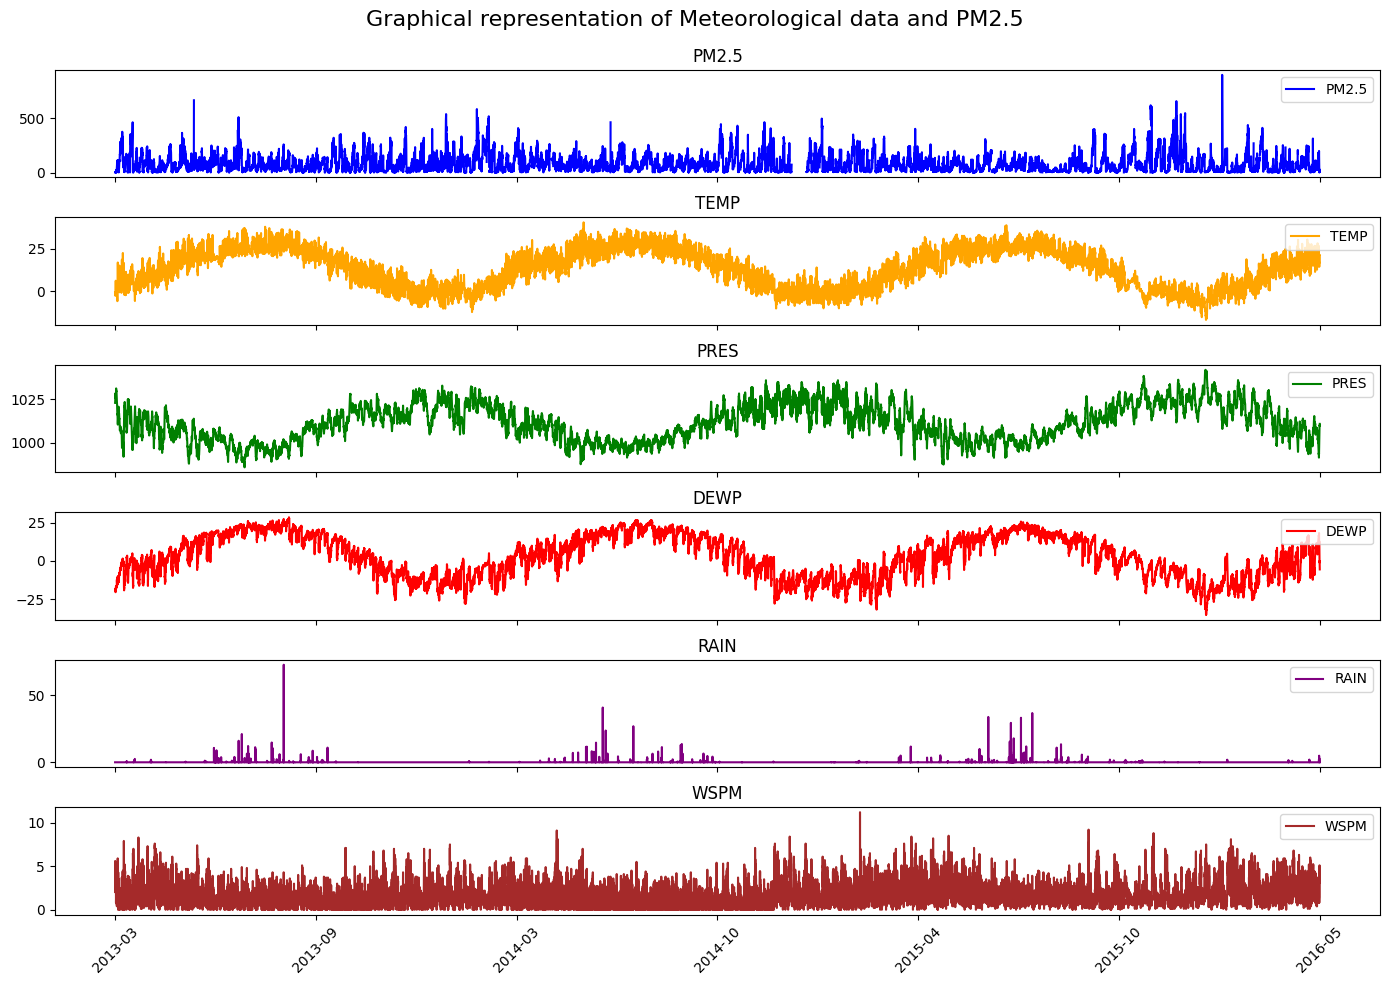

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'data' is your DataFrame with the mentioned columns

# Combine the separate date columns into a single datetime column
df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Define the columns you want to plot
columns_to_plot = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Define the colors for each plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create subplots with shared x-axis (date)
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(14, 10), sharex=True)

# Plot each of the columns on a separate subplot
for ax, col, color in zip(axs, columns_to_plot, colors):
    ax.plot(df['Date'], df[col], label=col, color=color)
    ax.set_title(col)
    ax.legend(loc='upper right')

# Rotate the date labels to avoid overlap
plt.setp(axs, xticks=df['Date'][::len(df)//6], xticklabels=df['Date'].dt.strftime('%Y-%m')[::len(df)//6])
plt.xticks(rotation=45)

# Ensure the main title and subplots do not overlap and adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Add a main title above all subplots
fig.suptitle('Graphical representation of Meteorological data and PM2.5', fontsize=16)


# Show the plot
plt.show()


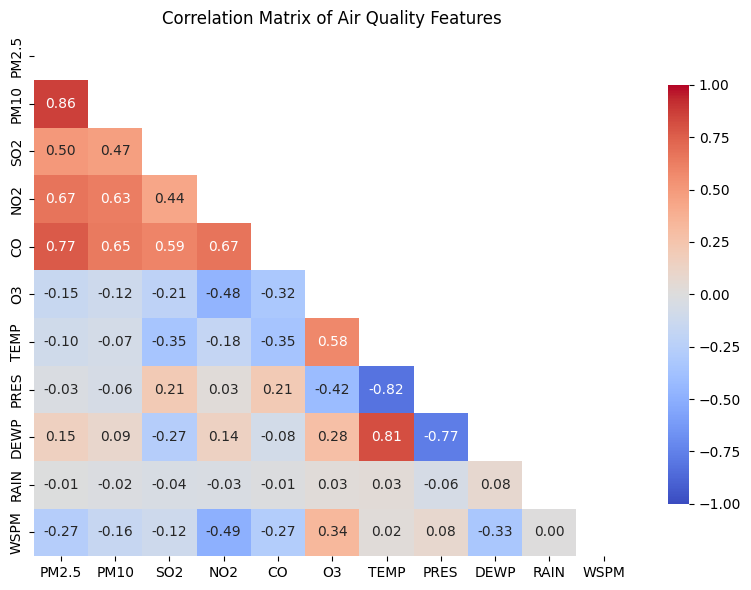

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame and it contains the relevant columns
# For example: data = pd.read_csv('your_file.csv')

# Calculate the correlation matrix
corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',	'PRES',	'DEWP',	'RAIN', 'WSPM']].corr()



# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix of Air Quality Features')

# Adjust layout to fit
plt.tight_layout()


# Show the plot
plt.show()


In [ ]:
# Apply more colorful styling with black text for all cells
styled_vif = vif_df.style.background_gradient(cmap='magma', subset=['VIF Score']) \
    .bar(subset=["VIF Score"], color='#d65f5f') \
    .set_caption("Variance Inflation Factors") \
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'), ('font-size', '18px'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'th',
         'props': [('background-color', '#32cd32'), ('color', 'black'), ('text-align', 'center')]},
        {'selector': 'td',
         'props': [('text-align', 'center'), ('color', 'black')]},  # Ensuring text color is black for all data cells
        {'selector': 'tr:nth-of-type(odd)',
         'props': [('background-color', '#f2e6ff')]},  # Zebra striping for odd rows
        {'selector': 'tr:nth-of-type(even)',
         'props': [('background-color', '#ccffcc')]},  # Zebra striping for even rows
        {'selector': 'tr:hover',
         'props': [('background-color', '#ffff99')]},  # Highlight on hover
    ]) \
    .set_precision(2) \
    .highlight_max(subset=['VIF Score'], color='red', axis=0)

# Display the styled DataFrame
styled_vif








<ipython-input-22-379b2850f70d>:19: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2) \


,Feature,VIF Score
0,const,35067.05
1,PM2.5,6.29
2,PM10,4.39
3,SO2,1.86
4,NO2,3.33
5,CO,3.53
6,O3,2.35
7,TEMP,7.70
8,PRES,3.50
9,DEWP,6.22


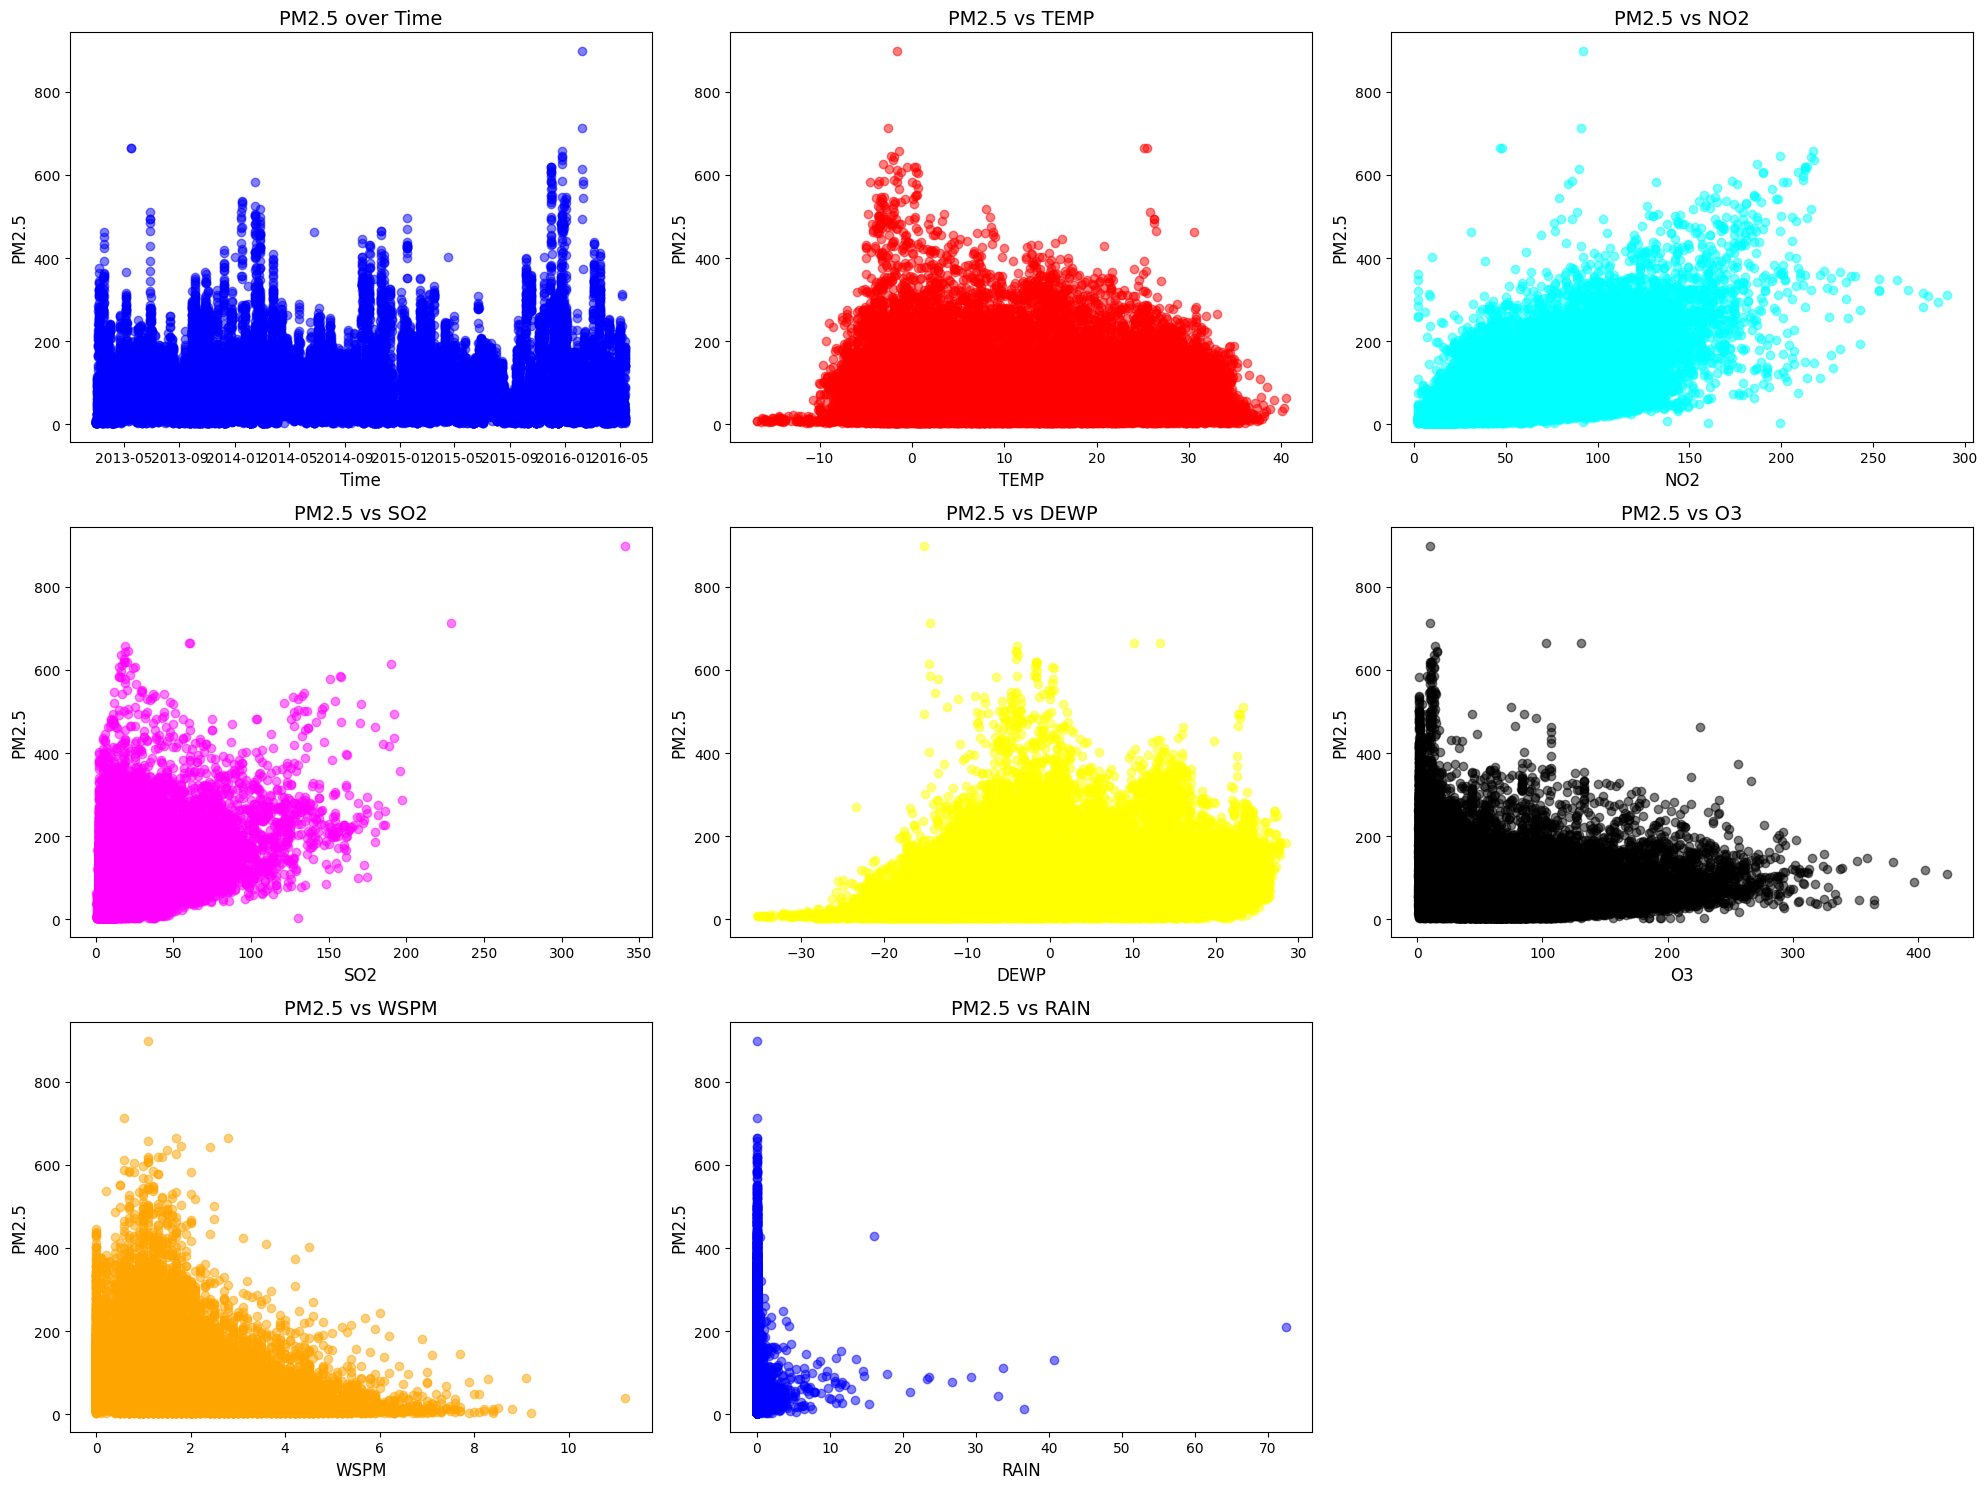

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'df' is your DataFrame and it contains the required columns.
features = ['TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']
date_columns = ['year', 'month', 'day', 'hour']  # Columns in your df that contain date-time info

# First, create a datetime column from the separate date columns
df['datetime'] = pd.to_datetime(df[date_columns])

# Colors for each plot
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

# Define the number of rows and columns for subplots
n_rows = 3
n_cols = 3  # Changed to 3 to include the time plot

# Create a figure with subplots
plt.figure(figsize=(20, 15))  # Adjust the size as needed

# Add time series plot
plt.subplot(n_rows, n_cols, 1)
plt.scatter(df['datetime'], df['PM2.5'], alpha=0.5, color='blue')
plt.title("PM2.5 over Time", fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)

# Loop over the features to create a scatter plot for each
for i, feature in enumerate(features, 2):  # Start from 2 to leave space for the time plot
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[feature], df['PM2.5'], alpha=0.5, color=colors[i % len(colors)])
    plt.title(f"PM2.5 vs {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('PM2.5', fontsize=12)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,2013-03-01 04:00:00


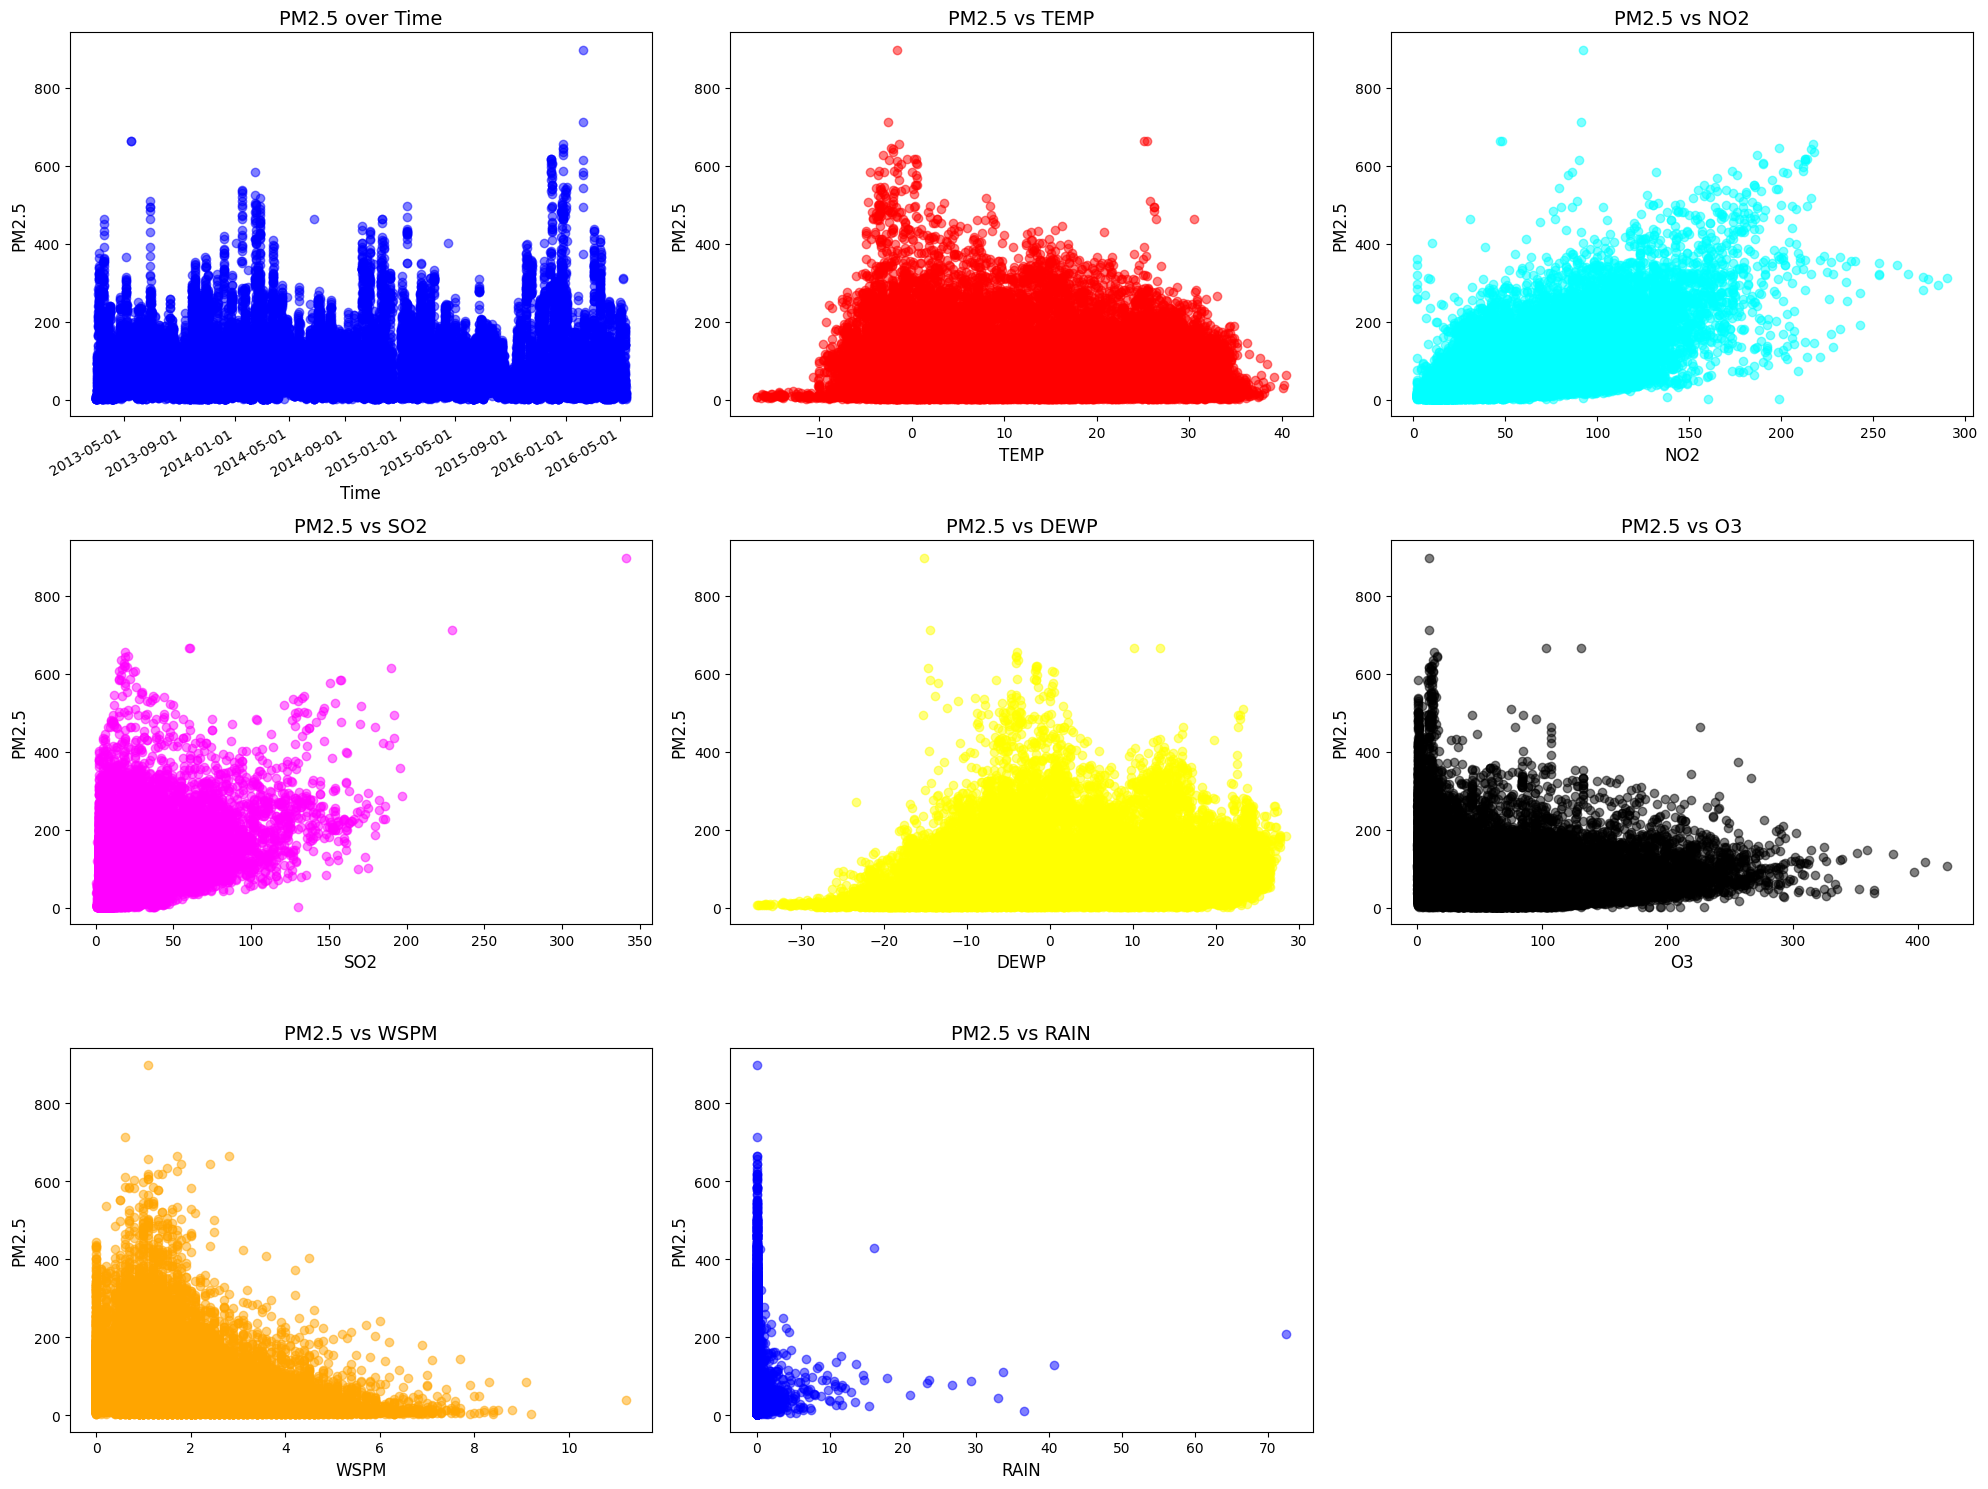

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line and put your actual data file

# Create a datetime column from the separate date columns
# df['datetime'] = pd.to_datetime(df[date_columns])  # Uncomment and adjust if needed

# Assuming 'df' has been loaded and 'datetime' column has been created
features = ['TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

# Define the number of rows and columns for subplots
n_rows = 3
n_cols = 3  # Including the time plot

# Create a figure with subplots
plt.figure(figsize=(20, 15))  # Adjust the size as needed

# Add time series plot
plt.subplot(n_rows, n_cols, 1)
plt.scatter(df['datetime'], df['PM2.5'], alpha=0.5, color='blue')
plt.title("PM2.5 over Time", fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)

# Format date on the x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto rotate dates

# Loop over the features to create a scatter plot for each
for i, feature in enumerate(features, 2):  # Start from 2 to leave space for the time plot
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[feature], df['PM2.5'], alpha=0.5, color=colors[i % len(colors)])
    plt.title(f"PM2.5 vs {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('PM2.5', fontsize=12)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# df.dropna(subset=['PM2.5'], inplace=True)
features = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']
df.dropna(subset=features, inplace=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [ ]:
# Assuming 'df' is your DataFrame containing the dataset
# Selecting the specified features: PM2.5, TEMP, NO2, SO2, CO, O3, WSPM, RAIN
# Adjust the column indices according to your DataFrame structure
features_columns = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']  # Use the actual column names from your DataFrame

# Select all rows for these features
training_set = df[features_columns].values

# Check the length of the training_set
length_of_training_set = len(training_set)
print(length_of_training_set)


25977


In [ ]:
training_set = training_set[-5000:]

**Feature Scaling**

In [ ]:
# normalize your data for BiGRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
lag = 48  # Number of hours to use as input to predict the next hour
n_obs = 5000  # Adjust this if needed based on your dataset size after preprocessing
features = 8  # Total number of features included

X_train = []
y_train = []

# Ensure you're selecting all features for X_train and only the PM2.5 values for y_train
for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])  # Include all features in the lagged window
    y_train.append(training_set_scaled[i, 0])  # Assuming PM2.5 is the first feature for prediction

# Convert lists to numpy arrays for training the BiGRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)



(4952, 48, 8)


In [ ]:
X_train.shape

(4952, 48, 8)

# **BI GRU**

without tuning hyperparameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first Bidirectional GRU layer with 200 units
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second Bidirectional GRU layer with 100 units
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third Bidirectional GRU layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(Bidirectional(GRU(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last Bidirectional GRU layer with 50 units
# This is the last GRU layer, so return_sequences is not needed
model.add(Bidirectional(GRU(units=50)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 48, 400)           252000    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 48, 400)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 48, 200)           301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 48, 200)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 48, 100)           75600     
 onal)                                                           
                                                        

Fitting the BI GRU to the Training set

In [ ]:
# Compiling the BiGRU
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
155/155 [==============================] - 16s 24ms/step - loss: 0.0054
Epoch 2/50
155/155 [==============================] - 3s 22ms/step - loss: 0.0017
Epoch 3/50
155/155 [==============================] - 3s 20ms/step - loss: 0.0014
Epoch 4/50
155/155 [==============================] - 3s 21ms/step - loss: 0.0013
Epoch 5/50
155/155 [==============================] - 4s 25ms/step - loss: 0.0012
Epoch 6/50
155/155 [==============================] - 3s 21ms/step - loss: 0.0011
Epoch 7/50
155/155 [==============================] - 4s 27ms/step - loss: 0.0012
Epoch 8/50
155/155 [==============================] - 4s 24ms/step - loss: 0.0011
Epoch 9/50
155/155 [==============================] - 3s 21ms/step - loss: 0.0010
Epoch 10/50
155/155 [==============================] - 3s 21ms/step - loss: 0.0011
Epoch 11/50
155/155 [==============================] - 3s 20ms/step - loss: 9.6641e-04
Epoch 12/50
155/155 [==============================] - 4s 24ms/step - loss: 9.5344e-04
Epoc

Making the predictions and visualising the results

In [ ]:
# Assuming 'sc' is your MinMaxScaler fitted on the training data
# And 'dataset_test' is your raw test dataset loaded from '/content/Test.csv'

# Load the test dataset (already done)
dataset_test = pd.read_csv('/content/Test.csv')

# Drop rows with NaN values in any of the columns you're using
dataset_test.dropna(subset=['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN'], inplace=True)

# Scale the test data using the same scaler as the training data
# Make sure to select the same features in the same order as the training set
test_features = dataset_test[['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']].values
test_features_scaled = sc.transform(test_features)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Reshape X_test if necessary (it might already be in the correct shape)
# X_test should now be shaped [samples, timesteps, features]
# No need to reshape based on the previous step since it already considers all features

# Make predictions
pred_PM2 = model.predict(X_test)

# Depending on your model's output, you might need to inverse scale the predictions
# If you scaled your target variable (PM2.5) during training


207/207 [==============================] - 4s 9ms/step


In [ ]:
pred_PM2 = model.predict(X_test)
pred_PM2

207/207 [==============================] - 2s 9ms/step


array([[0.05550265],
       [0.05116501],
       [0.0503723 ],
       ...,
       [0.02201394],
       [0.02898008],
       [0.03354677]], dtype=float32)

In [ ]:
# Assume pred_PM2 is your predictions with shape (num_samples, 1)
# Create an array with the same number of columns as the original scaled data
pred_full = np.zeros((pred_PM2.shape[0], 8))  # 8 for the number of features you have

# Assuming PM2.5 is the first column, fill in your predictions there
pred_full[:, 0] = pred_PM2.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the PM2.5 predictions after inverse transforming
pred_PM2_inverse = pred_full_inverse[:, 0]



In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_PM2 = dataset_test['PM2.5'].values[-len(pred_PM2):]  # Make sure to align the lengths

# Ensure real_PM2 is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching pred_PM2_inverse in length)
real_PM2 = real_PM2.reshape(-1, 1)  # Only needed if real_PM2 isn't already a 1D array

# Now proceed with RMSE calculation
RMSE = np.sqrt(np.mean((pred_PM2_inverse - real_PM2.ravel())**2))  # Use ravel() to ensure it's 1D for calculation
print("RMSE:", RMSE)


RMSE: 19.86978648545676


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_PM2, pred_PM2_inverse))

# Calculate MAE
mae = mean_absolute_error(real_PM2, pred_PM2_inverse)

# Calculate MSE
mse = mean_squared_error(real_PM2, pred_PM2_inverse)

# Calculate MAPE - Note: You have to ensure real_PM2 does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_PM2 - pred_PM2_inverse) / real_PM2)) * 100

# Calculate R-squared
r2 = r2_score(real_PM2, pred_PM2_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MSE: {:.4f}'.format(mse))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 19.8698
MAE: 12.2210
MSE: 394.8084
MAPE: 288.0149%
R-squared: 0.9452


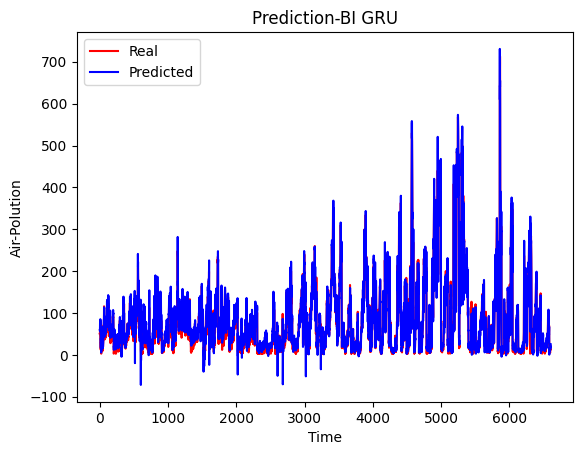

In [ ]:
plt.plot(real_PM2, color = 'red', label = 'Real')
plt.plot(pred_PM2_inverse, color = 'blue', label = 'Predicted')
plt.title('Prediction-BI GRU')
plt.xlabel('Time')
plt.ylabel('Air-Polution')
plt.legend()
plt.show()

Variable importance

In [ ]:
import numpy as np
import pandas as pd

# Assuming dataset_test is your pandas DataFrame with the original unscaled test features
# And sc is the MinMaxScaler instance you've fitted on the entire feature set

# Extract the scaling parameters for the PM2.5 feature
pm25_scaler_min = sc.min_[dataset_test.columns.get_loc('PM2.5')]
pm25_scaler_scale = sc.scale_[dataset_test.columns.get_loc('PM2.5')]

# Define the lag based on how many time steps back you used when creating sequences
lag = 48  # The lag you used when creating your X_test

# Create y_test using the true values of PM2.5 that immediately follow each sequence in X_test
y_test = dataset_test['PM2.5'].values[lag:lag+X_test.shape[0]]

# Manually apply the inverse transformation for PM2.5
y_test_unscaled = y_test * pm25_scaler_scale + pm25_scaler_min

# y_test_unscaled now contains the actual PM2.5 values in their original scale



207/207 [==============================] - 2s 8ms/step


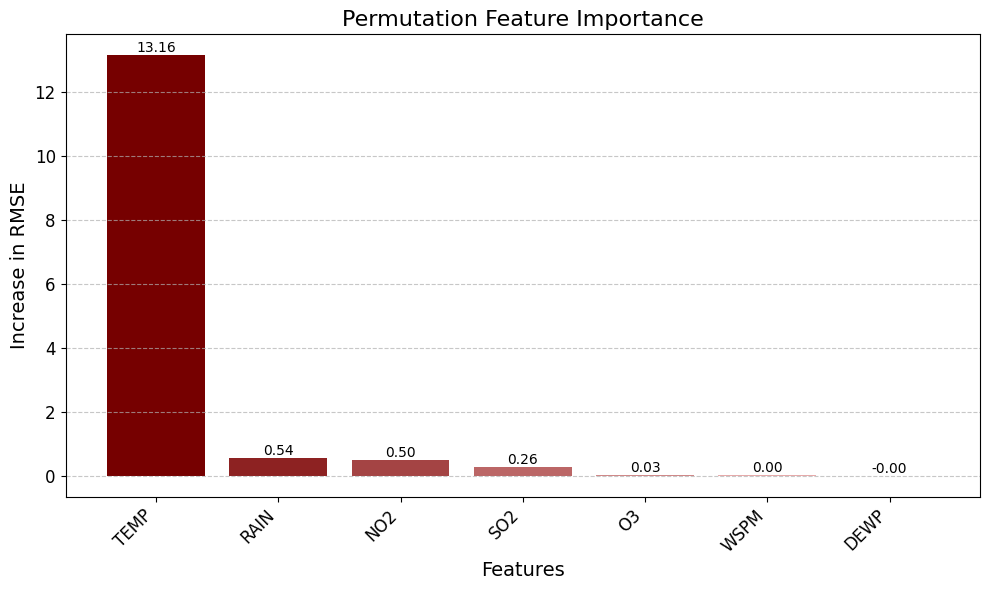

Sorted Feature Importances:
TEMP: 13.16
RAIN: 0.54
NO2: 0.50
SO2: 0.26
O3: 0.03
WSPM: 0.00
DEWP: -0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors  # Import the colors module
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

# Function to interpolate between two hex colors
def interpolate_colors(start_hex, end_hex, n):
    start_rgb = np.array(matplotlib.colors.to_rgb(start_hex))
    end_rgb = np.array(matplotlib.colors.to_rgb(end_hex))
    return [matplotlib.colors.to_hex((1 - ratio) * start_rgb + ratio * end_rgb) for ratio in np.linspace(0, 1, n)]

# Calculate permutation importance (assuming you've already defined this function)
# ...

# Define feature names based on your dataset
feature_names = ['TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']  # PM2.5 is the target

# Calculate feature importances
importance_scores = calculate_permutation_importance(model, X_test, y_test, feature_names)

# Sort features by importance
sorted_importances = sorted(importance_scores.items(), key=lambda item: item[1], reverse=True)

# Unpack the feature names and their importance scores
sorted_features, sorted_scores = zip(*sorted_importances)

# Create custom colors from dark red to light red
custom_colors = interpolate_colors('#760000', '#FFCCCC', len(sorted_features))

# Make the plot prettier
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_features, sorted_scores, color=custom_colors)

# Add the exact increase in RMSE on top of each bar
for bar, score in zip(bars, sorted_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Increase in RMSE', fontsize=14)
plt.title('Permutation Feature Importance', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid to the y-axis for better readability of the importance values
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Optionally print sorted importances
print("Sorted Feature Importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.2f}")




In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Assuming 'df' is your DataFrame containing the dataset with a 'date' column
# # df = pd.read_csv('your_dataset.csv')
# df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
# df.set_index('date', inplace=True)

# # Add seasonality features
# df['month'] = df.index.month
# df['day_of_week'] = df.index.dayofweek

# # List of features to use
# features = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN', 'month', 'day_of_week']

# # Dropping rows with NaN values for the features
# df.dropna(subset=features, inplace=True)

# # Selecting the features for training
# training_set = df[features].values

# # Normalizing the data
# sc = MinMaxScaler(feature_range=(0, 1))
# training_set_scaled = sc.fit_transform(training_set)

# # Creating lagged sequences
# lag = 48  # Number of time steps to use for the sequences
# n_obs = len(training_set_scaled)  # Total observations available
# n_features = len(features)  # Total number of features

# X_train = []
# y_train = []

# for i in range(lag, n_obs):
#     X_train.append(training_set_scaled[i-lag:i])
#     y_train.append(training_set_scaled[i, 0])  # Assuming PM2.5 is at index 0

# X_train, y_train = np.array(X_train), np.array(y_train)

# # Reshape input to fit the BiGRU network [samples, time steps, features]
# print(f"X_train shape before reshape: {X_train.shape}")
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

# # Define the BiGRU model
# model = Sequential()
# model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.1))
# model.add(Bidirectional(GRU(units=100, return_sequences=True)))
# model.add(Dropout(0.1))
# model.add(Bidirectional(GRU(units=50, return_sequences=True)))
# model.add(Dropout(0.1))
# model.add(Bidirectional(GRU(units=50)))
# model.add(Dropout(0.1))
# model.add(Dense(units=1))

# # Compile and fit the model
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train, y_train, epochs=50, batch_size=32)

# # Prepare the test set
# # Assuming you have already loaded your test dataset
# dataset_test = pd.read_csv('/content/Test.csv')
# dataset_test['date'] = pd.to_datetime(dataset_test['date'])
# dataset_test.set_index('date', inplace=True)

# # Add seasonality features to the test set
# dataset_test['month'] = dataset_test.index.month
# dataset_test['day_of_week'] = dataset_test.index.dayofweek

# # Select the features and normalize the test set
# test_set = dataset_test[features].values
# test_set_scaled = sc.transform(test_set)

# # Prepare the sequences for the test set
# X_test = []
# for i in range(lag, len(test_set_scaled)):
#     X_test.append(test_set_scaled[i-lag:i])

# X_test = np.array(X_test)

# # Make predictions
# predicted_PM2 = model.predict(X_test)

# # Inverse transform the predictions
# pred_full = np.zeros((predicted_PM2.shape[0], n_features))
# pred_full[:, 0] = predicted_PM2.ravel()
# predicted_PM2_inverse = sc.inverse_transform(pred_full)[:, 0]

# # Get the true values for PM2.5
# real_PM2 = dataset_test['PM2.5'].values[lag:]

# # Calculate evaluation metrics
# rmse = np.sqrt(mean_squared_error(real_PM2, predicted_PM2_inverse))
# mae = mean_absolute_error(real_PM2, predicted_PM2_inverse)
# mse = mean_squared_error(real_PM2, predicted_PM2_inverse)
# mape = np.mean(np.abs((real_PM2 - predicted_PM2_inverse) / real_PM2)) * 100
# r2 = r2_score(real_PM2, predicted_PM2_inverse)

# print('RMSE: {:.4f}'.format(rmse))
# print('MAE: {:.4f}'.format(mae))
# print('MSE: {:.4f}'.format(mse))
# print('MAPE: {:.4f}%'.format(mape))
# print('R-squared: {:.4f}'.format(r2))

# # Plot the real vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(real_PM2, color='red', label='Real PM2.5')
# plt.plot(predicted_PM2_inverse, color='blue', label='Predicted PM2.5')
# plt.title('PM2.5 Prediction')
# plt.xlabel('Time')
# plt.ylabel('PM2.5')
# plt.legend()
# # plt.show()


X_train shape before reshape: (25929, 48, 10)
Epoch 1/50
811/811 [==============================] - 398s 469ms/step - loss: 0.0020
Epoch 2/50
811/811 [==============================] - 376s 463ms/step - loss: 8.7612e-04
Epoch 3/50
811/811 [==============================] - 378s 467ms/step - loss: 8.0253e-04
Epoch 4/50
663/811 [=======================>......] - ETA: 1:09 - loss: 7.3392e-04

KeyboardInterrupt: 